# 10 Exercise - Advanced Linear Algebra

We've learned to do linear algebra with NumPy. In this exercise set, we will get some real practice with the techniques we have learned.

## Exercise 1:  Importing Numpy and the Linear Algebra Submodule

Import NumPy and the linalg submodule separately.

In [1]:
# Import NumPy and linalg
import numpy as np
from numpy import linalg

## Exercise 2: Diagonal and Orthogonal Matrices

Let's get some practice with diagonal and orthogonal matrices. First of all, create the following matrices: 

$$D = \begin{bmatrix} 12 & 0 & 0 \\ 0 & -2 & 0 \\ 0 & 0 & 3\end{bmatrix}, \qquad O = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & -1 & 0\end{bmatrix}$$

In [2]:
# Create the two matrices above
d = np.array([
    [12,0,0],
    [0,-2,0],
    [0,0,3],
])
o = np.array([
    [1,0,0],
    [0,0,1],
    [0,-1,0]
])

In [6]:
# Verify that the transpose O^T is the same as the inverse O^(-1) by using the np.isclose function
print(o.T)
print(linalg.inv(o))
print(np.isclose(o.T, linalg.inv(o)))

[[ 1  0  0]
 [ 0  0 -1]
 [ 0  1  0]]
[[ 1.  0.  0.]
 [-0. -0. -1.]
 [ 0.  1.  0.]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


## Exercise 3: A Family of Orthogonal Matrices

For any number $r$ the matrix 

$$O_{r} = \begin{bmatrix} \cos(r) & \sin(r)  \\ -sin(r) & \cos(r) \end{bmatrix}$$

is an orthogonal matrix. The matrix $O_{r}$ represents a rotation around the origin with angle $r$. Let us build $O_{1}$ and verify numerically that $O_{1}$ is an orthogonal matrix.

In [7]:
# Build the matrix $Q_{1}
q = np.array([
    [np.cos(1), np.sin(1)],
    [-np.sin(1), np.cos(1)],
])

In [10]:
# Verify that Q_1 is orthogonal.
print(q.T)
print(linalg.inv(q))
print(np.isclose(q.T, linalg.inv(q)))

[[ 0.54030231 -0.84147098]
 [ 0.84147098  0.54030231]]
[[ 0.54030231 -0.84147098]
 [ 0.84147098  0.54030231]]
[[ True  True]
 [ True  True]]


If you know trigonometry, then you can try to verify mathematically that $Q_{r}$ is orthogonal for any $r$.

## Exercise 4: QR Decomposition

Recall that the QR decomposition is a way to write any matrix $A$ as $A = QR$, where $Q$ is orthogonal and $R$ is upper-triangular. Let us do this for an image.

In [11]:
# DON'T MODIFY THIS CELL, ONLY RUN IT.
from skimage import data
import matplotlib.pyplot as plt
camera = data.camera()

In [13]:
# Perform a QR decomposition of the camera image. Call the orthogonal part Q and upper-triangular part R.
Q, R = linalg.qr(camera)

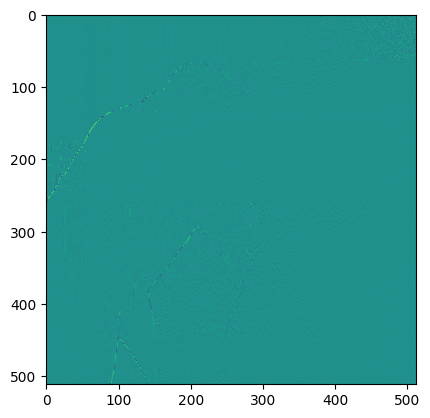

In [15]:
# Show the image represented by Q
plt.imshow(Q)

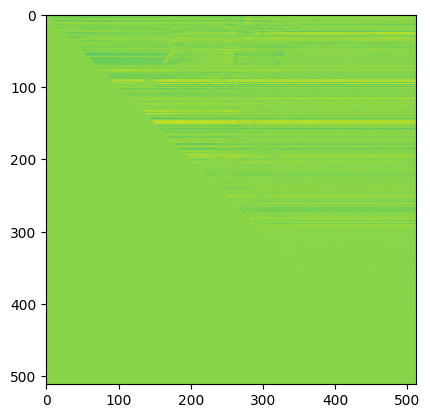

In [16]:
# Show the image represented by R
plt.imshow(R)

As you can see, the values in $Q$ and $R$ seems completely unrelated to those in $A$, and do not seem to produce images that show anything worthwhile. Nevertheless, all the necessary information are there. 

Try to show the product $QR$ as an image to see that we have not lost any information.

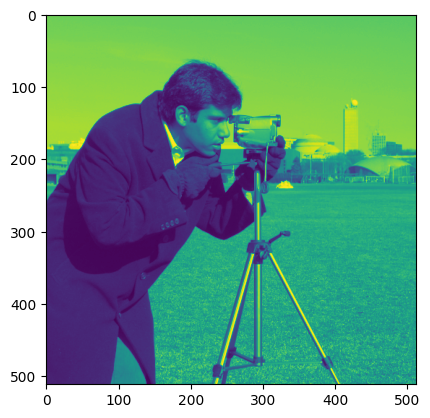

In [18]:
# Showing the product
plt.imshow(Q@R)

## Exercise 5: Least Squares to Approximate a Function (Challenge)

A common problem is to approximate complex data with simple functions. Say we have the function

$$f(t) = e^{t^2} + \cos(3t)$$

where $t$ takes values between $0$ and $1$. 

How can we approximate the function $f(t)$ with a second-degree polynomial? Well, we can first evaluate the function $f(t)$ in the $101$ points between $0$ and $1$ given by

$$t = \begin{bmatrix} t_{0} \\ t_{1} \\ \vdots \\ t_{99} \\ t_{100}\end{bmatrix} = \begin{bmatrix} 0.00 \\ 0.01 \\ \vdots \\ 0.99 \\ 1.00\end{bmatrix}.$$

Then we get the vector 

$$y = \begin{bmatrix} f(t_{0}) \\ f(t_{1}) \\ \vdots \\ f(t_{99}) \\ f(t_{100})\end{bmatrix} = \begin{bmatrix} f(0.00) \\ f(0.01) \\ \vdots \\ f(0.99) \\ f(1.00)\end{bmatrix}$$

The goal is to find the BEST second-degree polynomial

$$p(t) = a_{0} + a_{1}t + a_{2}t^{2},$$ 

that approximates $f(t)$. How do we choose the coefficients $a_{0}, a_{1}, a_{2}$? Let us make the vector 

$$x = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{2}\end{bmatrix}.$$

### Exercise 5a:
Before we explain how to find $x$, let us set up some of the variables we have defined.

In [19]:
# We need 101 points between 0 and 1. Use np.linspace and save it to a variable called "t_values".
t_values = np.linspace(0, 1, 101)
# We need the vector y described above. Make it by using np.exp, np.cos, and the "points" variable above.
# Call the variable "y_values"
y_values = np.exp(t_values ** 2) + np.cos(3 * t_values)

Pay attention to the goal: We want to find $x$. The notation $x$ and $y$ might give you the idea that we will somehow solve a matrix system 

$$Ax = y.$$ 
But what is the matrix $A$?

What we have described is a <b>polynomial approximation problem</b>. For such a problem, the matrix $A$ we need to use is the <i>Vandermonde matrix</i> given by 

$$A = \begin{bmatrix} 1 & t_{0} & t_{0}^2 \\ 1 & t_{1} & t_{1}^2 \\ \vdots & \vdots & \vdots \\ 1 & t_{99} & t_{99}^2 \\ 1 & t_{100} & t_{100}^2 \end{bmatrix}.$$

### Exercise 5b:
Although the matrix $A$ looks scary, we have everything we need to make it. Let us do this now!

In [22]:
# Make the matrix A
t_values = t_values.reshape(101, 1)
A = np.hstack((t_values ** 0, t_values ** 1, t_values ** 2))
A
# HINT: Look up the np.hstack function. You will need to reshape 
# the "t_values" variable to have shape (101, 1) for this to work.

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e-02, 1.000e-04],
       [1.000e+00, 2.000e-02, 4.000e-04],
       [1.000e+00, 3.000e-02, 9.000e-04],
       [1.000e+00, 4.000e-02, 1.600e-03],
       [1.000e+00, 5.000e-02, 2.500e-03],
       [1.000e+00, 6.000e-02, 3.600e-03],
       [1.000e+00, 7.000e-02, 4.900e-03],
       [1.000e+00, 8.000e-02, 6.400e-03],
       [1.000e+00, 9.000e-02, 8.100e-03],
       [1.000e+00, 1.000e-01, 1.000e-02],
       [1.000e+00, 1.100e-01, 1.210e-02],
       [1.000e+00, 1.200e-01, 1.440e-02],
       [1.000e+00, 1.300e-01, 1.690e-02],
       [1.000e+00, 1.400e-01, 1.960e-02],
       [1.000e+00, 1.500e-01, 2.250e-02],
       [1.000e+00, 1.600e-01, 2.560e-02],
       [1.000e+00, 1.700e-01, 2.890e-02],
       [1.000e+00, 1.800e-01, 3.240e-02],
       [1.000e+00, 1.900e-01, 3.610e-02],
       [1.000e+00, 2.000e-01, 4.000e-02],
       [1.000e+00, 2.100e-01, 4.410e-02],
       [1.000e+00, 2.200e-01, 4.840e-02],
       [1.000e+00, 2.300e-01, 5.29

Great, now we have everything we need. However, the system $Ax = y$ is not solvable! There is no second order polynomial that takes exactly the values $y$ at the points in the variable <b>t_values</b>. 

So what do we do? We use least squares to find the next best thing!

### Exercise 5c:

In [23]:
# Use least squares to find the best approximation. Call the resulting variable "x_values".
x_values = linalg.lstsq(A, y_values, rcond=None)[0]
# HINT: Remember to use the rcond=None in the linalg.lstsq function. 
# Print out x_values rounded to 2 decimals
np.around(x_values, 2)

array([ 2.25, -2.8 ,  1.98])

Hence the best approximation with a second-order polynomial is with the function 

$$p(t) = 2.25 - 2.8t + 1.98t^2.$$

### Exercise 5d:
To see that it is a good approximation, let us plot it against the scary function $f(t)$.

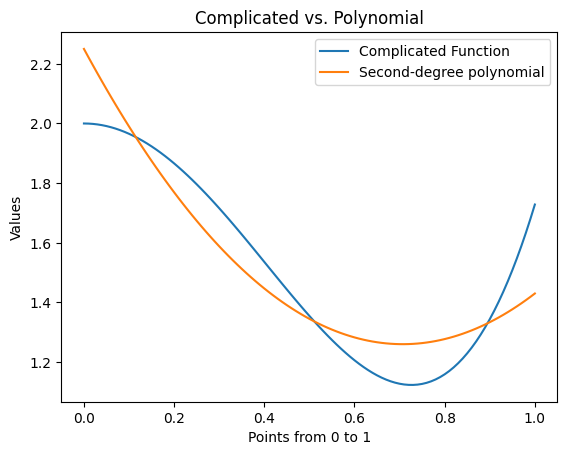

In [24]:
# Plot the complicated function f(t)
plt.plot(t_values, y_values, label="Complicated Function")

# Plot the second-degree polynomial p(t)
plt.plot(t_values, 2.25 - 2.8 * t_values + 1.98 * t_values ** 2, label="Second-degree polynomial")

# Show the plot
plt.xlabel("Points from 0 to 1")
plt.ylabel("Values")
plt.title("Complicated vs. Polynomial")
plt.legend()
plt.show()

## Moral of the Story

We've seen that NumPy makes working with advanced linear algebra effortlessly. We can then focus on the linear algebra, rather than spending time making our own algorithms. Notice from Exercise 5 that linear algebra can be used to approximate functions as well. 